In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
import seaborn as sns

from sklearn.linear_model import *


# Models

In [52]:
df = pd.DataFrame().from_dict(data)
df.to_csv('people_in_metro.csv')

In [53]:
df = pd.read_csv('people_in_metro.csv')
df

,Unnamed: 0,day,people using smartphone,people with no smart
0,0,0,58.000000,26.000000
1,1,1,42.000000,18.000000
2,2,2,52.666667,23.333333
3,3,3,67.666667,29.333333
4,4,4,63.666667,27.333333
5,5,5,31.666667,14.333333
6,6,6,56.333333,23.666667
7,7,7,52.333333,24.666667
8,8,8,51.666667,21.333333
9,9,9,59.666667,25.333333


## Data Cleaning


In [54]:
df = df.set_index(df['day'])
df = df.drop(labels='day',axis=1) # drop column day
df = df.drop(labels='Unnamed: 0',axis=1) # drop column day

In [58]:
df.columns = ['smarthone','no_smarphone']
df['count_people'] = df['smarthone'] + df['no_smarphone']


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [59]:
df

,smarthone,no_smarphone,count_people
day,,,
0,58.000000,26.000000,84.0
1,42.000000,18.000000,60.0
2,52.666667,23.333333,76.0
3,67.666667,29.333333,97.0
4,63.666667,27.333333,91.0
5,31.666667,14.333333,46.0
6,56.333333,23.666667,80.0
7,52.333333,24.666667,77.0
8,51.666667,21.333333,73.0


(array([2., 3., 6., 4., 2., 8., 6., 2., 3., 4.]),
 array([11.33333333, 13.26666667, 15.2       , 17.13333333, 19.06666667,
        21.        , 22.93333333, 24.86666667, 26.8       , 28.73333333,
        30.66666667]),
 <a list of 10 Patch objects>)

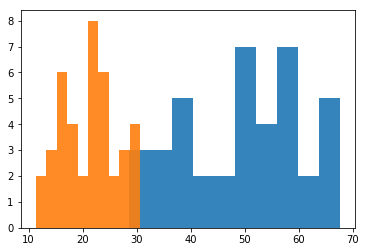

In [61]:
plt.hist(df['smarthone'],alpha = 0.9)
plt.hist(df['no_smarphone'],alpha = 0.9)

we can see that the count of people with smarphone in metro are between 30 and 65 and withoun smarphone is between 10 and 30


In [62]:
### lets to what part of all peole are with smarphone

(array([5., 3., 3., 5., 4., 7., 1., 5., 3., 4.]),
 array([0.67719298, 0.68248956, 0.68778613, 0.69308271, 0.69837928,
        0.70367586, 0.70897243, 0.71426901, 0.71956558, 0.72486216,
        0.73015873]),
 <a list of 10 Patch objects>)

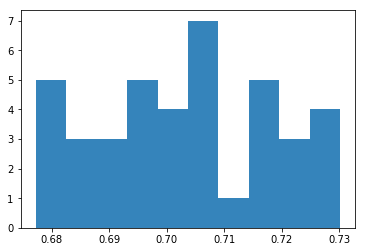

In [64]:
p_smart = df['smarthone']/ df['count_people']
plt.hist(p_smart,alpha = 0.9)

(array([ 19.,  69., 200., 495., 680., 721., 483., 243.,  72.,  18.]),
 array([0.65382087, 0.66352765, 0.67323443, 0.6829412 , 0.69264798,
        0.70235476, 0.71206154, 0.72176832, 0.73147509, 0.74118187,
        0.75088865]),
 <a list of 10 Patch objects>)

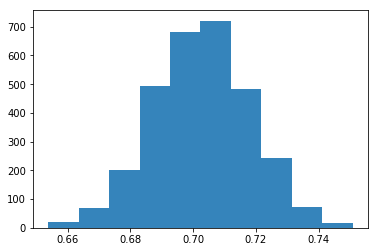

In [75]:
mean = np.array(p_smart).mean()
sd = np.array(p_smart).std()
new = np.random.normal(mean, sd, 3000)
plt.hist(new,alpha = 0.9)

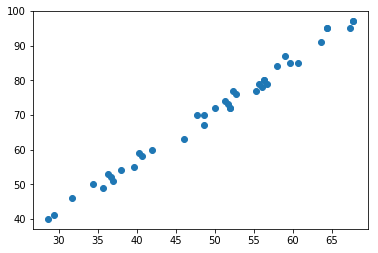

In [76]:
### let to scatter


plt.scatter(df['smarthone'], df['count_people'])

In [78]:
# we can see the model

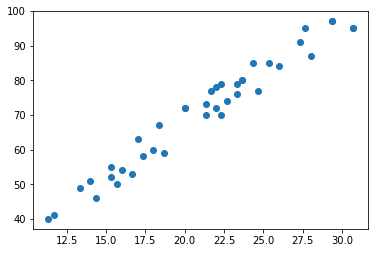

In [80]:
plt.scatter(df['no_smarphone'], df['count_people'])

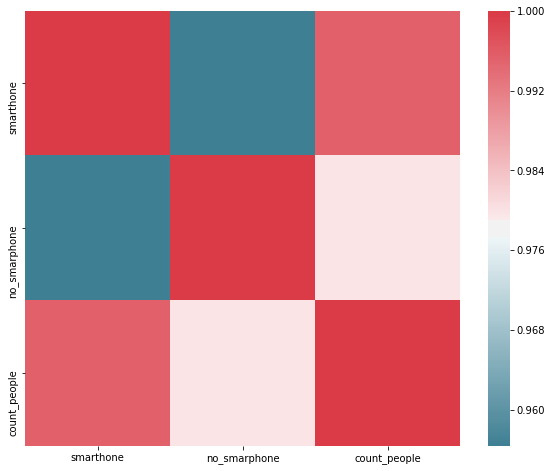

In [84]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#  We can see a big collison

# let't to make some regression model

(40, 1)
(40,)


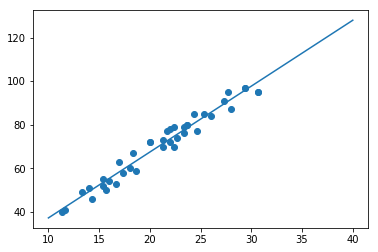

In [136]:
#plt.scatter(df['no_smarphone'], df['count_people'])
x = np.array(df['no_smarphone'])
x = x.T

x = x.reshape(40,1)
y= df['count_people']
print(x.shape)
print(y.shape)
reg = LinearRegression().fit(x,y)
a = reg.coef_
b = reg.intercept_ 
z = lambda i,a,b:a*i + b
x_data = np.linspace(10,40)
y_data = [z(i,a,b) for i in x_data]


plt.plot(x_data,y_data)
plt.scatter(df['no_smarphone'],df['count_people'])

## we can see linear model